#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:
from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier, ClassifiersComparison
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={"positive": 1, "negative": -1})
points = dataset.getPoints()

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf = ConvexHullClassifier.buildInstance(coordinate1=0, coordinate2=1, nFolds=5)

#### Criando construtor de instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [6]:
KNNclf = KNNClassifier.buildInstance(maxK=30, nFolds=5)

#### Comparação da diferença média para as métricas _Precisão_, _Sensibilidade_, _F1 Score_ e _Acurácia_ entre os classificadores par a par

Para efeutar a comparação, um bootstrapping foi feito usando 100 amostras com reposição e 100 indivíduos em cada uma delas.

In [7]:
clfComparison = ClassifiersComparison(points, [KNNclf, CHclf], sampleSize=100, nSamples=100)
meanDiff = clfComparison.run()
meanDiff

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  recall: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  re

,Precision,Recall,F1,Accuracy,Label
0,-0.250000,0.175000,-0.250000,-0.033333,KNNClassifier/ConvexHullClassifier
1,0.233333,-0.750000,0.233333,0.466667,KNNClassifier/ConvexHullClassifier
2,-0.304348,-0.700000,NaN,0.233333,KNNClassifier/ConvexHullClassifier
3,0.000000,0.000000,NaN,0.066667,KNNClassifier/ConvexHullClassifier
4,0.225000,-0.500000,0.225000,0.333333,KNNClassifier/ConvexHullClassifier
...,...,...,...,...,...
195,-0.484615,0.400000,-0.484615,-0.633333,ConvexHullClassifier/KNNClassifier
196,NaN,-0.400000,NaN,-0.133333,ConvexHullClassifier/KNNClassifier
197,-0.100000,0.857143,-0.100000,-0.500000,ConvexHullClassifier/KNNClassifier
198,-0.333333,-0.111111,NaN,-0.033333,ConvexHullClassifier/KNNClassifier


#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (0, 1)

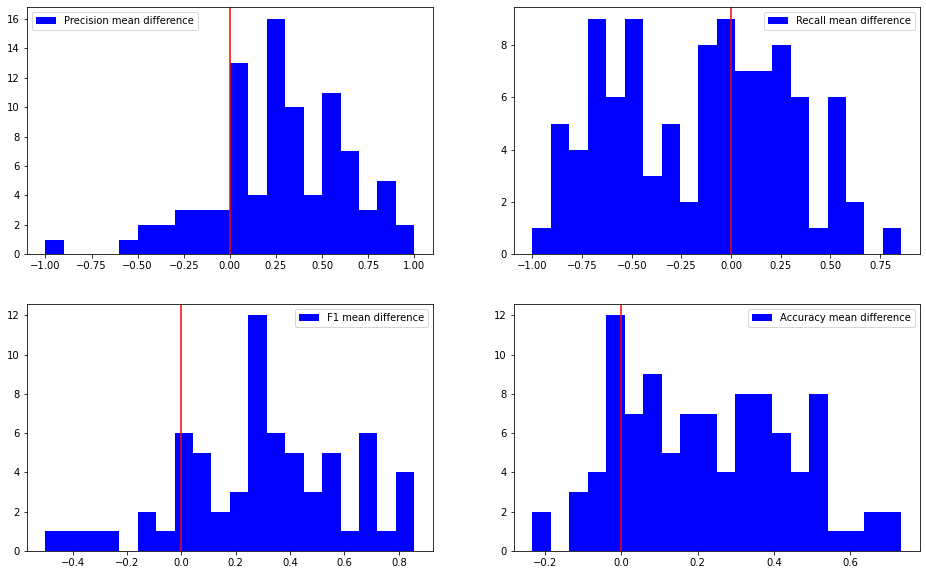

In [8]:
comparisonDiff = meanDiff[meanDiff['Label'] == 'KNNClassifier/ConvexHullClassifier']

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0][0].hist(comparisonDiff["Precision"], bins=20, label="Precision mean difference", color='b')
ax[0][0].legend()
ax[0][0].axvline(x=0, color='r')

ax[0][1].hist(comparisonDiff["Recall"], bins=20, label="Recall mean difference", color='b')
ax[0][1].legend()
ax[0][1].axvline(x=0, color='r')

ax[1][0].hist(comparisonDiff["F1"], bins=20, label="F1 mean difference", color='b')
ax[1][0].legend()
ax[1][0].axvline(x=0, color='r')

ax[1][1].hist(comparisonDiff["Accuracy"], bins=20, label="Accuracy mean difference", color='b')
ax[1][1].legend()
ax[1][1].axvline(x=0, color='r')